# Project - Egypt's GDP and Unemployment

The goal of this project is to investigate wether the GDP has an effect on the development of the unemployment rate. To help looking into this, Okun's Law is included in the thesis. Okun's law states that for each 1 % increase in unemployment, a country's GDP is going to be roughly 2 % lower than its potential GDP. In this study it will be looked into how the unemployment rates act, in corresponse to the trend we see for GDP. We will be looking at Egypt's GDP and unemployment rates from 1991 to 2014.

## Part 1

In [245]:
#Importing Packages

In [246]:
import pandas as pd
from pandas_datareader import wb
import wbdata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [247]:
#Importing data for Egypt's GDP from World Bank, 1991-2014

In [248]:
gdp_wb = wb.download(indicator='NY.GDP.PCAP.KD', country=['EG'], start=1991, end=2014)                
gdp_wb = gdp_wb.rename(columns = {'NY.GDP.PCAP.KD':'gdp'})
gdp_wb = gdp_wb.reset_index()
gdp_wb.year = gdp_wb.year.astype(int)
gdp_wb.head(11)

,country,year,gdp
0,"Egypt, Arab Rep.",2014,2608.260442
1,"Egypt, Arab Rep.",2013,2590.945457
2,"Egypt, Arab Rep.",2012,2593.112377
3,"Egypt, Arab Rep.",2011,2593.214102
4,"Egypt, Arab Rep.",2010,2602.479549
5,"Egypt, Arab Rep.",2009,2524.381342
6,"Egypt, Arab Rep.",2008,2456.687446
7,"Egypt, Arab Rep.",2007,2333.454571
8,"Egypt, Arab Rep.",2006,2217.433320
9,"Egypt, Arab Rep.",2005,2112.723735


The trend of GDP is seen to be overall increasing, however a smaller relative increase the last few years

In [249]:
gdpgrowth_wb = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['EG'], start=1991, end=2014)
gdpgrowth_wb = gdpgrowth_wb.rename(columns = {'NY.GDP.MKTP.KD.ZG':'gdp_growth'})
gdpgrowth_wb = gdpgrowth_wb.reset_index()
gdpgrowth_wb.year = gdpgrowth_wb.year.astype(int)
gdpgrowth_wb.head(-13)

,country,year,gdp_growth
0,"Egypt, Arab Rep.",2014,2.915912
1,"Egypt, Arab Rep.",2013,2.185466
2,"Egypt, Arab Rep.",2012,2.226200
3,"Egypt, Arab Rep.",2011,1.764572
4,"Egypt, Arab Rep.",2010,5.147235
5,"Egypt, Arab Rep.",2009,4.673600
6,"Egypt, Arab Rep.",2008,7.156284
7,"Egypt, Arab Rep.",2007,7.087827
8,"Egypt, Arab Rep.",2006,6.843838
9,"Egypt, Arab Rep.",2005,4.471744


Again, the growth is seen to be not as significant that last few years, after the crisis in 2009, however quite high increases up to 2009.

In [250]:
#Implementing unemployment data from excel file

In [251]:
unempl = pd.read_excel('Egypt Unemployment.xlsx')
print(unempl)

    year  unemployment
0   1990         8.044
1   1991         8.791
2   1992         8.952
3   1993        10.911
4   1994        11.143
5   1995        11.176
6   1996         9.467
7   1997         8.671
8   1998         7.955
9   1999         7.692
10  2000         8.995
11  2001         8.808
12  2002        10.050
13  2003        11.275
14  2004        10.526
15  2005        11.468
16  2006        10.917
17  2007         9.205
18  2008         8.767
19  2009         9.367
20  2010         9.210
21  2011        10.379
22  2012        12.372
23  2013        13.000
24  2014        13.366


Its clear its quite a swinging unemployment rate, with no real pattern at the first glance. However, the rate is decreasing from 2005 to 2009, to then increase afterwards, in correlation to the financial crisis, which also is seems to be linked to the decrease in relative GDP growth those years. Furthermore, during the years with a high growth in GDP, from 2006 to 2008, the unemployment rate is at near lowest point for the period. 

In [252]:
#Changing type

In [253]:
gdpgrowth_wb.year = gdpgrowth_wb.year.astype(int)
gdp_wb.year = gdp_wb.year.astype(int)
unempl.year = unempl.year.astype(int)

In [254]:
#Merging data

In [255]:
mergeddata = pd.merge(unempl, gdpgrowth_wb, how='outer', on = ['year'])
print(unempl.shape)
print(gdpgrowth_wb.shape)
print(mergeddata.shape)
mergeddata.sample(6)

(25, 2)
(24, 3)
(25, 4)


,year,unemployment,country,gdp_growth
16,2006,10.917,"Egypt, Arab Rep.",6.843838
6,1996,9.467,"Egypt, Arab Rep.",4.988731
8,1998,7.955,"Egypt, Arab Rep.",5.575497
14,2004,10.526,"Egypt, Arab Rep.",4.092072
22,2012,12.372,"Egypt, Arab Rep.",2.226200
15,2005,11.468,"Egypt, Arab Rep.",4.471744


In [256]:
#Sorting data

In [257]:
mergeddata.sort_index()

,year,unemployment,country,gdp_growth
0,1990,8.044,NaN,NaN
1,1991,8.791,"Egypt, Arab Rep.",1.125405
2,1992,8.952,"Egypt, Arab Rep.",4.472859
3,1993,10.911,"Egypt, Arab Rep.",2.900791
4,1994,11.143,"Egypt, Arab Rep.",3.973172
5,1995,11.176,"Egypt, Arab Rep.",4.642459
6,1996,9.467,"Egypt, Arab Rep.",4.988731
7,1997,8.671,"Egypt, Arab Rep.",5.492355
8,1998,7.955,"Egypt, Arab Rep.",5.575497
9,1999,7.692,"Egypt, Arab Rep.",6.053439


In [258]:
#Cleaning data, and converting to a float (dropping by instances of missing data)

In [259]:
mergeddata = mergeddata.dropna()
mergeddata.unemployment = mergeddata.unemployment.astype('float')
mergeddata.gdp_growth = mergeddata.gdp_growth.astype('float')

## Part 2

In [260]:
#Analyzing data with statistics

In [261]:
mergeddata['gdp_growth'].describe()

count    24.000000
mean      4.303265
std       1.733006
min       1.125405
25%       2.912132
50%       4.472302
75%       5.513140
max       7.156284
Name: gdp_growth, dtype: float64

The mean of the growth of GDP is 4.303, which does show quite a large positive growth in gdp during the period, while highest growth was a staggering 7.1562 percent, and lowest 1.1254 percent.

In [262]:
mergeddata['unemployment'].describe()

count    24.000000
mean     10.102625
std       1.532183
min       7.692000
25%       8.916000
50%       9.758500
75%      11.151250
max      13.366000
Name: unemployment, dtype: float64

Here the first number that jumps to the eye, is the mean - the overall change for the periode, which is 10.102. This tells us, that the unemployment rate overall is increasing during the period. The highest rate recorded was 13.366 percent in 2014, which tells us Egypt is still trying to overcome the financial crisis. The lowest point recorded is 7.692 in 1999 , which is quite a large amount of the workforce in unemployment, however its almost half of the worst situation in 2014.
In addition, a certain amount of dispersion in the data seems present, which the std (standard deviation) tells us.

In [263]:
#Calculation of the correlation between the two

In [264]:
mergeddata.corr(method='pearson')

,year,unemployment,gdp_growth
year,1.000000,0.457167,-0.041357
unemployment,0.457167,1.000000,-0.490076
gdp_growth,-0.041357,-0.490076,1.000000


The correlation between the unemployment and the growth is calcualted, to check whether or not Okun's law is fulfilled here.
This calculation tells us, that to a growth in GDP by 1, a raise in unemployment on 0.457 percent follows, which is not at all in link to Okun's law. It does not make sense logically or for most of the data, however an explanation for this result could be that Egypt have been struggling the past decade.

In [265]:
#Positive growth?

In [266]:
I = mergeddata['unemployment'] > 0
mergeddata.loc[I, :].head()

,year,unemployment,country,gdp_growth
1,1991,8.791,"Egypt, Arab Rep.",1.125405
2,1992,8.952,"Egypt, Arab Rep.",4.472859
3,1993,10.911,"Egypt, Arab Rep.",2.900791
4,1994,11.143,"Egypt, Arab Rep.",3.973172
5,1995,11.176,"Egypt, Arab Rep.",4.642459


In addition, a somewhat decent positive growth is shown here from 1991 to 1995, to an increase in unemployment. This is not in link with Okuns law either, and could also support the result we found, doing the correlation.

In [267]:
#Plot 1

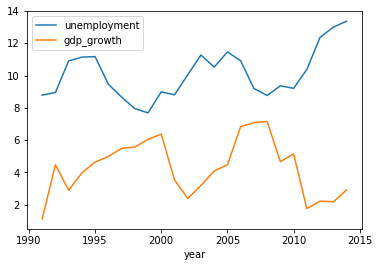

In [268]:
def plot(mergeddata):
   mergeddata_indexed = mergeddata.set_index('year')
   mergeddata_indexed.plot(legend=True)
    
plot(mergeddata)

This plots enlightens us on the contradiction between the two, whereas the increase in unemployment is followed by an somewhat relative increase in GDP. Its quite clear from mid to late 90's, and from early 2000's to late 2000's, where an increase in both sections is seen. Its somewhat inconclusive during some of the periods, however the overall link is clear.

In [269]:
#Plot 2

Text(0, 0.5, 'unemployment')

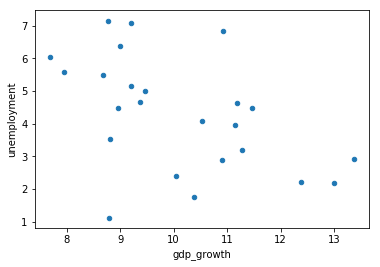

In [270]:
xy = mergeddata.plot(x = 'unemployment', y = 'gdp_growth', kind = 'scatter') 
xy.set_xlabel('gdp_growth') 
xy.set_ylabel('unemployment')

This plot does also support the results we found prior to this section, it shows us that there is a positive correlation between GDP and unemployment, which completely contradicts Okun's law

In [271]:
#Additional packages

In [272]:
from numpy import arange,array,ones
from scipy import stats

In [273]:
#Using regression

In [274]:
x = mergeddata['unemployment'] 
y = mergeddata['gdp_growth']

In [275]:
#Clear overview

Text(0.5, 0, 'unemployment')

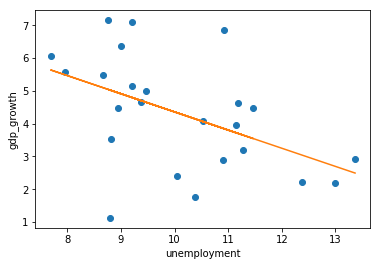

In [276]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'o', x, line)
ax = plt.gca()
fig = plt.gcf()
ax.set_ylabel('gdp_growth') 
ax.set_xlabel('unemployment')

Here the linear fit based on the prior scatterplot furthermore underlines the positive, yet surprising correlation between GDP and unemployment, however a rather large portion of the datapoints does not seem to be near the regresion line at all.